## Import

In [ ]:
import pandas as pd
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/STC tv/STC TV Dataset T2.xlsb')

In [ ]:
df.head()

,Unnamed: 0,date_,Total_watch_time_in_houres
0,0,2018-01-01,1123.551944
1,1,2018-01-02,1000.129722
2,2,2018-01-03,881.924444
3,3,2018-01-04,782.669444
4,4,2018-01-05,1051.939444


In [ ]:
stc = df.copy()

In [ ]:
# stc = stc.drop(['Unnamed: 0'], axis=1)

## Exploratory Data Analysis (EDA)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Setting styles for plots
sns.set(style="whitegrid")

In [ ]:
stc.head()

,Unnamed: 0,date_,Total_watch_time_in_houres
0,0,2018-01-01,1123.551944
1,1,2018-01-02,1000.129722
2,2,2018-01-03,881.924444
3,3,2018-01-04,782.669444
4,4,2018-01-05,1051.939444


### Overview

In [ ]:
# Get basic information about the dataset
print(stc.info())
print('------------------------------------------')
# Display summary statistics
print(stc.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  86 non-null     int64         
 1   date_                       86 non-null     datetime64[ns]
 2   Total_watch_time_in_houres  86 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 KB
None
------------------------------------------
       Unnamed: 0                          date_  Total_watch_time_in_houres
count   86.000000                             86                   86.000000
mean    42.500000  2018-02-28 17:01:23.720930304                  780.817926
min      0.000000            2018-01-01 00:00:00                  562.124722
25%     21.250000            2018-01-30 06:00:00                  707.709653
50%     42.500000            2018-02-28 12:00:00                  763.181389

In [ ]:
stc = stc.drop(['Unnamed: 0'], axis=1)

### Handling Missing Values

In [ ]:
# Check for missing values
print(stc.isnull().sum())
print('------------------------------------------')
# Example: Fill missing values or drop rows/columns with missing values
stc = stc.dropna()  # Drop rows with missing values


date_                         0
Total_watch_time_in_houres    0
dtype: int64
------------------------------------------


###Extracting Date Features

In [ ]:
stc= stc.rename(columns={'date_': 'date'})

# Extract year, month, and day from the 'date' column
stc['year'] = stc['date'].dt.year
stc['month'] = stc['date'].dt.month
stc['week'] = stc['date'].dt.isocalendar().week
stc['day'] = stc['date'].dt.day


stc.head(8)
# Recheck columns
stc.columns = ['date', 'Total_watch_time_in_hours', 'year', 'month', 'week', 'day']

# Display the updated dataframe
print(stc.head(8))


        date  Total_watch_time_in_hours  year  month  week  day
0 2018-01-01                1123.551944  2018      1     1    1
1 2018-01-02                1000.129722  2018      1     1    2
2 2018-01-03                 881.924444  2018      1     1    3
3 2018-01-04                 782.669444  2018      1     1    4
4 2018-01-05                1051.939444  2018      1     1    5
5 2018-01-08                 841.178333  2018      1     2    8
6 2018-01-09                 873.495000  2018      1     2    9
7 2018-01-10                 970.475000  2018      1     2   10


In [ ]:
# Calculate the total watch time for each month
monthly_watch_time = stc.groupby('month')['Total_watch_time_in_hours'].sum()

print(f"Total watch time: {stc['Total_watch_time_in_hours'].sum()}")
print('------------------------------------------------')
# Display the total watch time for each month
print(monthly_watch_time)

Total watch time: 67150.34166666667
------------------------------------------------
month
1    19931.016111
2    16469.292500
3    16602.283333
4    14147.749722
Name: Total_watch_time_in_hours, dtype: float64


### Univariate Analysis

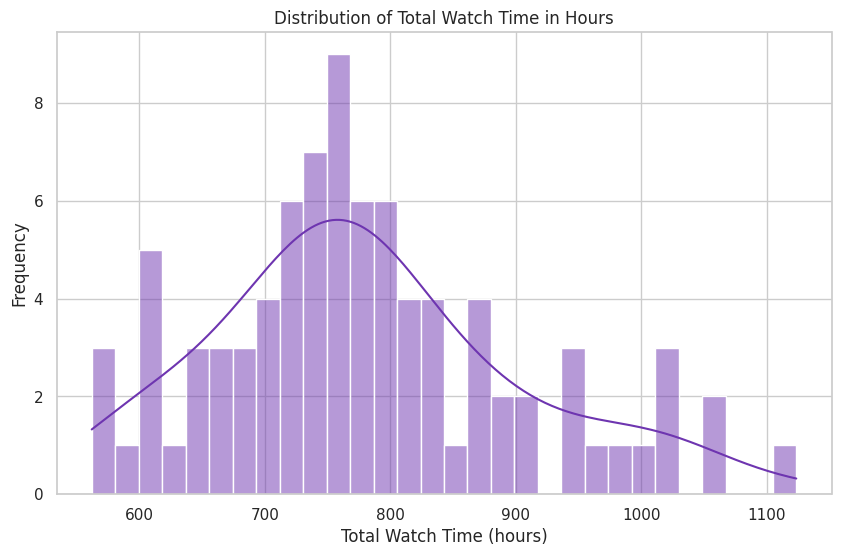

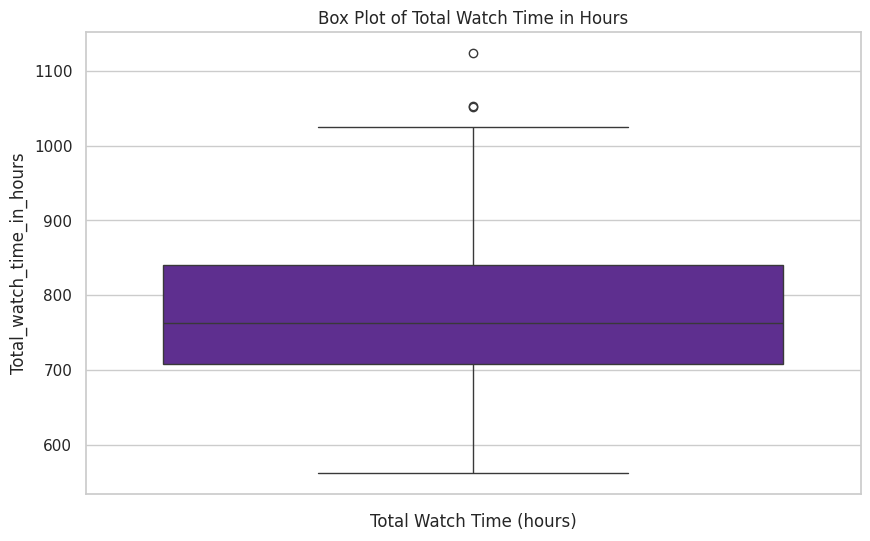

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the purple-themed color palette
sns.set_palette(['#5e1f9f', '#6e35b0', '#7e4ac2'])

# Plot the distribution of Total Watch Time with transparent background
plt.figure(figsize=(10, 6), facecolor='none')  # Make the figure background transparent
ax = sns.histplot(stc['Total_watch_time_in_hours'], bins=30, kde=True, color='#6e35b0')
ax.set_facecolor('none')  # Make the axes background transparent
plt.title('Distribution of Total Watch Time in Hours')
plt.xlabel('Total Watch Time (hours)')
plt.ylabel('Frequency')
plt.show()

# Box plot for Total Watch Time to detect outliers with transparent background
plt.figure(figsize=(10, 6), facecolor='none')  # Make the figure background transparent
ax = sns.boxplot(stc['Total_watch_time_in_hours'], color='#5e1f9f')
ax.set_facecolor('none')  # Make the axes background transparent
plt.title('Box Plot of Total Watch Time in Hours')
plt.xlabel('Total Watch Time (hours)')
plt.show()


### Time Series Analysis

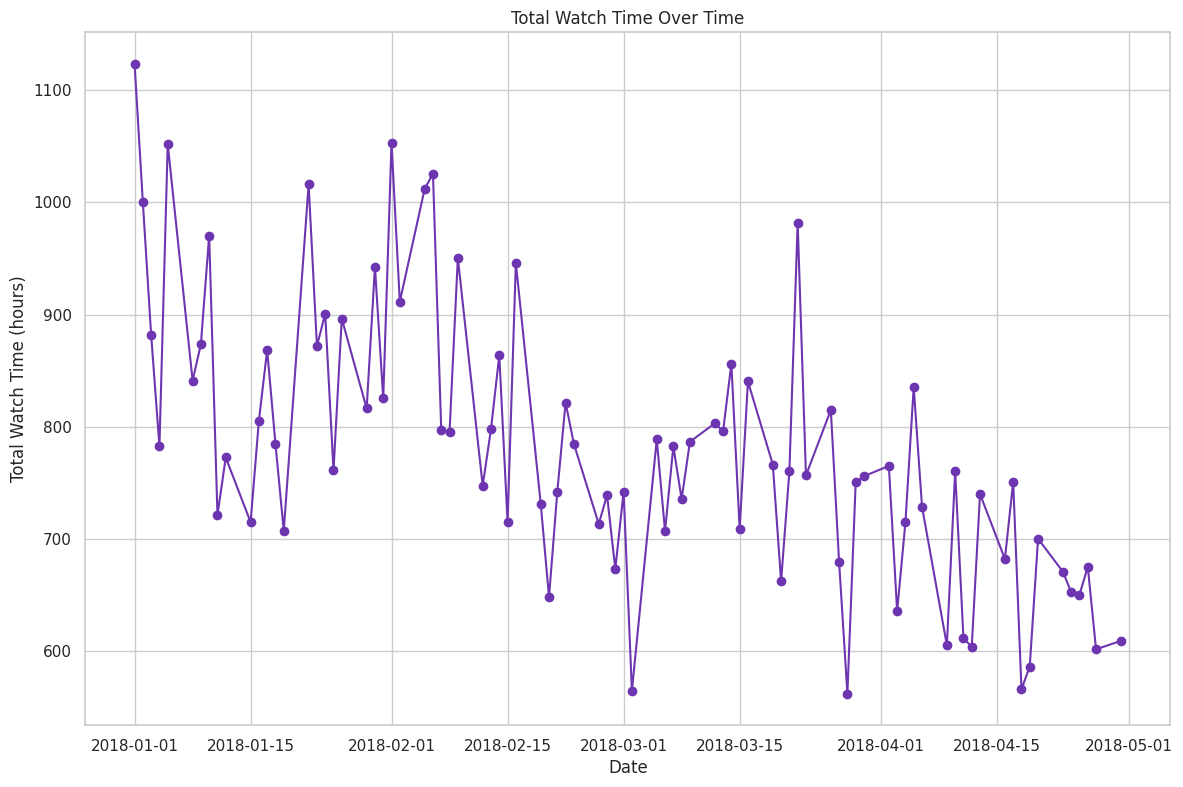

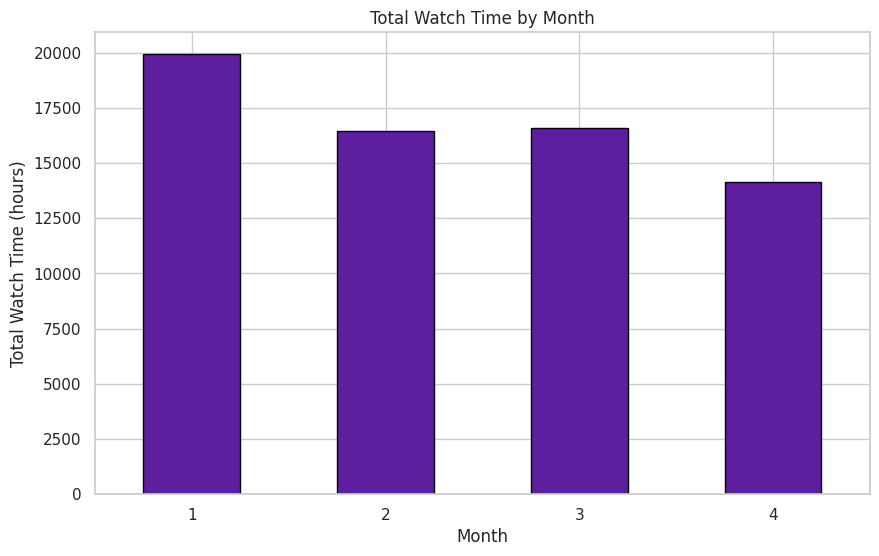

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the purple-themed color palette
sns.set_palette(['#5e1f9f', '#6e35b0', '#7e4ac2'])

# Line plot of Total Watch Time over time with transparent background
plt.figure(figsize=(14, 9), facecolor='none')  # Transparent figure background
plt.plot(stc['date'], stc['Total_watch_time_in_hours'], marker='o', color='#6e35b0')
plt.gca().set_facecolor('none')  # Transparent axes background
plt.title('Total Watch Time Over Time')
plt.xlabel('Date')
plt.ylabel('Total Watch Time (hours)')
plt.grid(True)
plt.show()

# Bar plot of Total Watch Time by Month with transparent background
plt.figure(figsize=(10, 6), facecolor='none')  # Transparent figure background
monthly_watch_time.plot(kind='bar', color='#5e1f9f', edgecolor='black')
plt.gca().set_facecolor('none')  # Transparent axes background
plt.title('Total Watch Time by Month')
plt.xlabel('Month')
plt.ylabel('Total Watch Time (hours)')
plt.xticks(rotation=360)
plt.show()


### Pie chart for Monthly Watch Time

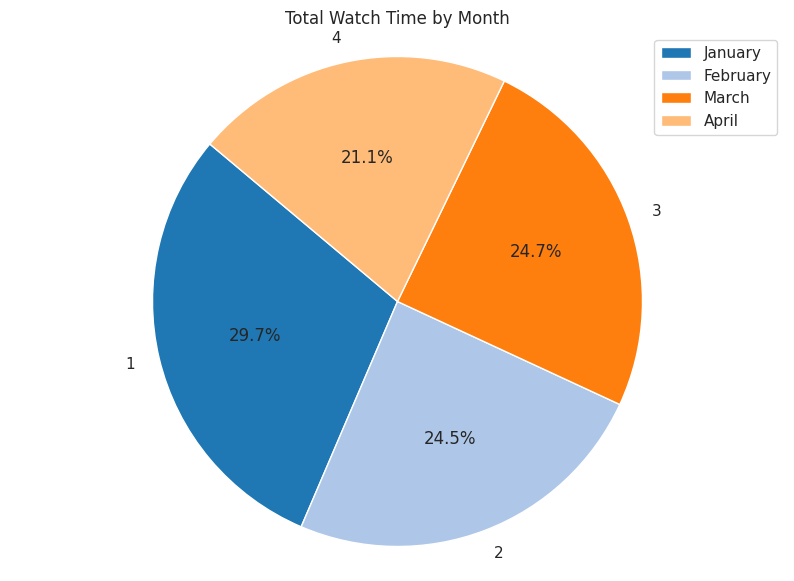

In [ ]:
# Create a pie chart for monthly watch time
plt.figure(figsize=(10, 7))
monthly_watch_time.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Total Watch Time by Month')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Customize the labels to show month names
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
labels = [months[i-1] for i in monthly_watch_time.index]
plt.legend(labels, loc="best")

# Show the pie chart
plt.show()


### Avr

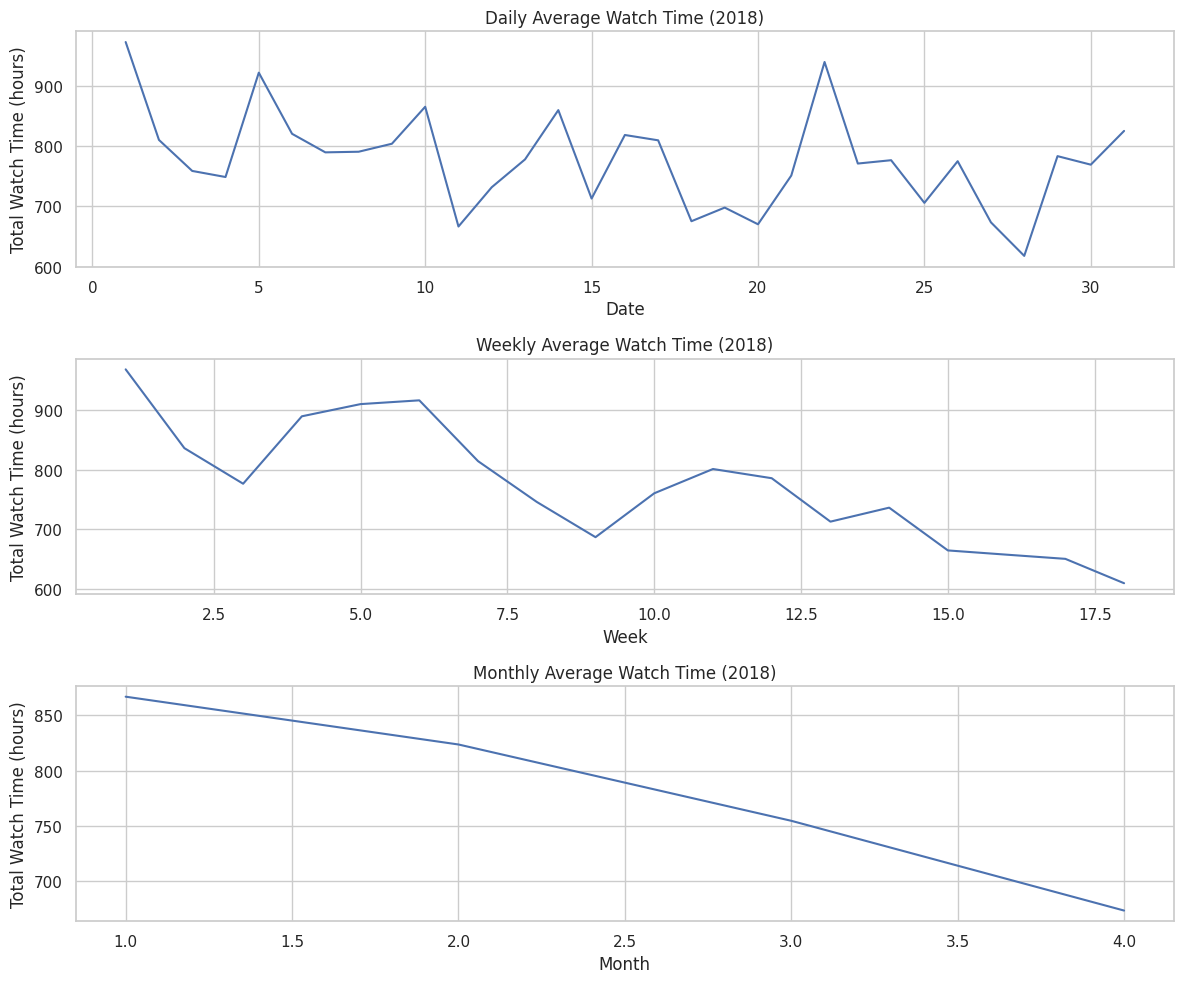

In [ ]:
stc['date'] = pd.to_datetime(stc['date'])
# stc['year'] = stc['date'].dt.year
# stc['month'] = stc['date'].dt.month
# stc['day'] = stc['date'].dt.day

# Daily Average Watch Time
daily_stc = stc.groupby('day')['Total_watch_time_in_hours'].mean()

# annually Average Watch Time (optional)
weekly_stc = stc.groupby('week')['Total_watch_time_in_hours']

# Monthly Average Watch Time (optional)
monthly_stc = stc.groupby('month')['Total_watch_time_in_hours']

# Create a figure with 3 rows and 1 column (adjust as needed)
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Daily Average Watch Time
axes[0].plot(daily_stc)
axes[0].set_title("Daily Average Watch Time (2018)")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Total Watch Time (hours)")
axes[0].grid(True)

# Annually Average Watch Time (optional)
axes[1].plot(weekly_stc.mean())  # Assuming annually_stc is defined elsewhere
axes[1].set_title("Weekly Average Watch Time (2018)")  # Adjust title if needed
axes[1].set_xlabel("Week")  # Adjust label if 'annually_stc' represents years
axes[1].set_ylabel("Total Watch Time (hours)")
axes[1].grid(True)

# Monthly Average Watch Time (optional)
axes[2].plot(monthly_stc)
axes[2].set_title("Monthly Average Watch Time (2018)")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Total Watch Time (hours)")
axes[2].grid(True)

# Adjust layout to prevent overlapping elements
plt.tight_layout()
plt.show()


### Feature Scaling

- Standardization
- Normalization



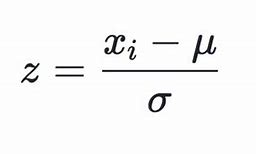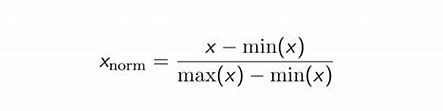

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler_standard = StandardScaler()
stc['hours_standardized'] = scaler_standard.fit_transform(stc[['Total_watch_time_in_hours']])

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
stc['hours_normalized'] = scaler_minmax.fit_transform(stc[['Total_watch_time_in_hours']])

# Display the scaled features
print(stc.head())

        date  Total_watch_time_in_hours  year  month  week  day  \
0 2018-01-01                1123.551944  2018      1     1    1   
1 2018-01-02                1000.129722  2018      1     1    2   
2 2018-01-03                 881.924444  2018      1     1    3   
3 2018-01-04                 782.669444  2018      1     1    4   
4 2018-01-05                1051.939444  2018      1     1    5   

   hours_standardized  hours_normalized  
0            2.802981          1.000000  
1            1.793597          0.780163  
2            0.826879          0.569619  
3            0.015142          0.392829  
4            2.217312          0.872446  


### Plotting the Normalization and Standardization

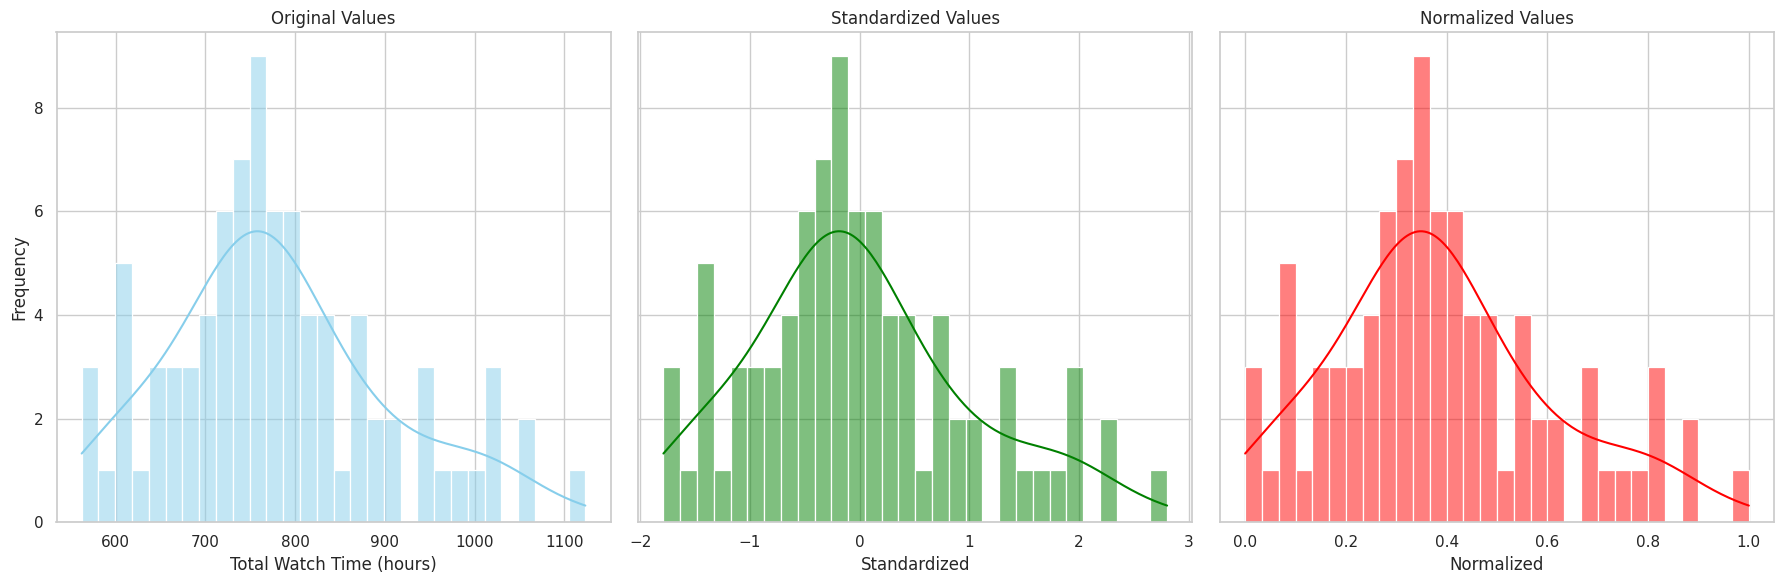

In [ ]:
# Plotting the scaled features
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot original values
sns.histplot(stc['Total_watch_time_in_hours'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Original Values')
axes[0].set_xlabel('Total Watch Time (hours)')
axes[0].set_ylabel('Frequency')

# Plot standardized values
sns.histplot(stc['hours_standardized'], bins=30, kde=True, color='green', ax=axes[1])
axes[1].set_title('Standardized Values')
axes[1].set_xlabel('Standardized')

# Plot normalized values
sns.histplot(stc['hours_normalized'], bins=30, kde=True, color='red', ax=axes[2])
axes[2].set_title('Normalized Values')
axes[2].set_xlabel('Normalized')

plt.tight_layout()
plt.show()

## ARIMA - Hozaifa


### Check Stationarity
ARIMA models require stationary data, meaning the mean, variance, and seasonality (if present) are constant over time. You might need differencing to achieve stationarity.
- Apply Unit Root Tests, like Dickey-Fuller (DF): test the stationarity. If rejects (p-value > significance level), data need to transform.



In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# def is_stationary(data):
#   # Ensure data is a pandas Series
#   data = pd.Series(data)

#   # Perform Dickey-Fuller test with trend term (optional: 'nt')
#   adf_result = adfuller(data, autolag='AIC')

#   # Print test statistic, p-value, etc. (for reference)
#   print(f"ADF Statistic: {adf_result[0]}")
#   print(f"p-value: {adf_result[1]}")
#   print(f"Critical Values:")
#   for key, value in adf_result[4].items():
#       print(f"\t{key}: {value}")

#   # Reject null hypothesis (data has unit root) for p-value <= significance level (e.g., 0.05)
#   return adf_result[1] <= 0.05


# if is_stationary(stc['Total_watch_time_in_hours']):
#   print("Data appears stationary.")
# else:
#   print("Data appears non-stationary. Differencing might be needed.")


In [ ]:
stc['Total_watch_time_in_hours'].head()

0    1123.551944
1    1000.129722
2     881.924444
3     782.669444
4    1051.939444
Name: Total_watch_time_in_hours, dtype: float64

In [ ]:
import plotly.express as px

def plt_stc_views(df: pd.DataFrame, y: str):
    fig = px.line(df, x='date', y=y, labels={'month': 'Date', y: 'Watch Hours'})
    fig.update_layout(template='simple_white', title_text='VIEWS', width=650, title_x=0.5, height=400)
    return fig.show()

# Call the function with your DataFrame and the desired column
plt_stc_views(df=stc, y='Total_watch_time_in_hours')


In [ ]:
from scipy.stats import boxcox

stc['hours_boxcot'], lam = boxcox(stc['Total_watch_time_in_hours'])


In [ ]:
stc = stc.rename(columns={'views_boxcot': 'hours_boxcot'})
stc.head()

,date,Total_watch_time_in_hours,year,month,week,day,hours_standardized,hours_normalized,hours_boxcot
0,2018-01-01,1123.551944,2018,1,1,1,2.802981,1.000000,2.605326
1,2018-01-02,1000.129722,2018,1,1,2,1.793597,0.780163,2.595254
2,2018-01-03,881.924444,2018,1,1,3,0.826879,0.569619,2.583894
3,2018-01-04,782.669444,2018,1,1,4,0.015142,0.392829,2.572636
4,2018-01-05,1051.939444,2018,1,1,5,2.217312,0.872446,2.599676


In [ ]:
plt_stc_views(df=stc, y='hours_boxcot')

In [ ]:
stc.head()

,date,Total_watch_time_in_hours,year,month,week,day,hours_standardized,hours_normalized,hours_boxcot
0,2018-01-01,1123.551944,2018,1,1,1,2.802981,1.000000,2.605326
1,2018-01-02,1000.129722,2018,1,1,2,1.793597,0.780163,2.595254
2,2018-01-03,881.924444,2018,1,1,3,0.826879,0.569619,2.583894
3,2018-01-04,782.669444,2018,1,1,4,0.015142,0.392829,2.572636
4,2018-01-05,1051.939444,2018,1,1,5,2.217312,0.872446,2.599676


### Modeling
- Find the best orders (ACF & PACF)

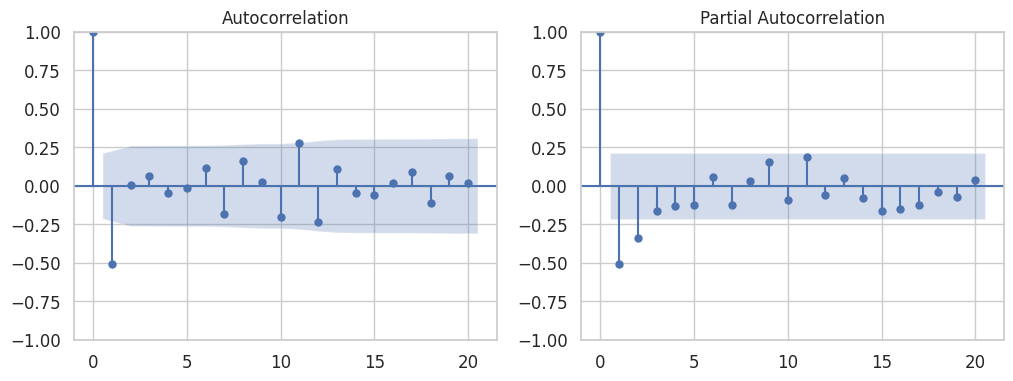

In [ ]:
# Import packages
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Difference the stc
stc["hours_diff"] = stc["Total_watch_time_in_hours"].diff()
stc.dropna(inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
# Plot acf and pacf
plot_acf(stc['hours_diff'], ax=ax1)
plot_pacf(stc['hours_diff'], method='ywm', ax=ax2)
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

# What is in the blue region is autocorrelations are not statistically significant

**Conclusions:**

- AR (p) Component: The significant partial autocorrelation at lag 1 suggests that an autoregressive model of order 1 (AR(1)) might be appropriate.

- MA (q) Component: The significant autocorrelation at lag 1 also suggests a moving average model of order 1 (MA(1)) might be considered.

- Mixed Model (ARIMA): Given the patterns, an **ARIMA(1,0,1)** model might be a good starting point for modeling this time series. The significant negative partial autocorrelation at *lag 2* suggests considering slightly higher orders for AR might be warranted, potentially checking **ARIMA(2,0,1)** as well.

---

**Further steps:**
- **Model Selection:** Try fitting ARIMA(1,0,1) and potentially ARIMA(2,0,1) models to see which provides a better fit based on AIC/BIC criteria
- **Diagnostics:** After fitting the model, check the residuals to ensure there is no remaining autocorrelation, confirming the adequacy of the model.

### Training

In [ ]:
# Import packages
from statsmodels.tsa.arima.model import ARIMA
from scipy.special import inv_boxcox

# ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:893.2479525778461

# Split train and test
train = stc.iloc[:-int(len(stc) * 0.2)]
test = stc.iloc[-int(len(stc) * 0.2):]

# Build ARIMA model and inverse the boxcox
model = ARIMA(test['hours_boxcot'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), aic=891.3413930684919).fit()
boxcox_forecasts = model.forecast(len(stc))
forecasts = inv_boxcox(boxcox_forecasts, lam)

TypeError: ARIMA.__init__() got an unexpected keyword argument 'aic'

In [ ]:
mod = sm.tsa.statespace.SARIMAX(stc['Total_watch_time_in_hours'],
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit(disp=0)
print(results.summary().tables[1])

In [ ]:
stc['date'] = pd.to_datetime(stc['date'])

In [ ]:
pre = results.predict(start=stc['date'].index[0])

###Results

In [ ]:
# Import packages
import plotly.graph_objects as go

def plot_forecasts(forecasts: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['date'], y=train['Total_watch_time_in_hours'], name='Train'))
    fig.add_trace(go.Scatter(x=test['date'], y=test['Total_watch_time_in_hours'], name='Test'))
    fig.add_trace(go.Scatter(x=test['date'], y=forecasts, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Views')

    return fig.show()

# Plot the forecasts
plot_forecasts(forecasts, 'ARIMA')


In [ ]:
import itertools
import statsmodels.api as sm
from pylab import rcParams
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(stc['Total_watch_time_in_hours'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=False)

            results = mod.fit(disp=0)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
             continue

In [ ]:
! pip install pmdarima

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

smodel = pm.auto_arima(stc['Total_watch_time_in_hours'], seasonal=True, m=4, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

best_order = smodel.order
best_seasonal_order = smodel.seasonal_order
print(f'Best order: {best_order}')
print(f'Best seasonal order: {best_seasonal_order}')

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
plot_acf(stc['hours_boxcot'])
plot_pacf(stc['hours_boxcot'])
plt.show()


In [ ]:
import itertools
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define the p, d, q ranges
p = range(0, 5)
d = range(0, 3)
q = range(0, 5)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Use AIC to find the best model
aic_values = []
params = []

for param in pdq:
    try:
        model = ARIMA(train['hours_boxcot'], order=param)
        results = model.fit()
        aic_values.append(results.aic)
        params.append(param)
    except:
        continue

# Find the parameters with the lowest AIC
optimal_params = params[aic_values.index(min(aic_values))]
print(f'Optimal parameters: {optimal_params}')


In [ ]:
# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA
from scipy.special import inv_boxcox
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Build ARIMA model with optimized parameters
model = ARIMA(train['hours_boxcot'], order=(12, 1, 12)).fit()

# Forecast for the test period
boxcox_forecasts = model.forecast(steps=len(test))
forecasts = inv_boxcox(boxcox_forecasts, lam)

# Calculate accuracy metrics
mae = mean_absolute_error(test['Total_watch_time_in_hours'], forecasts)
mse = mean_squared_error(test['Total_watch_time_in_hours'], forecasts)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['Total_watch_time_in_hours'] - forecasts) / test['Total_watch_time_in_hours'])) * 100

# Print the accuracy metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate accuracy metrics for training data
train_mae = mean_absolute_error(train['Total_watch_time_in_hours'], forecasts)
train_mse = mean_squared_error(train['Total_watch_time_in_hours'], forecasts)
train_rmse = np.sqrt(train_mse)
train_mape = np.mean(np.abs((train['Total_watch_time_in_hours'] - forecasts) / train['Total_watch_time_in_hours'])) * 100

# Print the accuracy metrics for training data
print(f'Training Mean Absolute Error (MAE): {train_mae}')
print(f'Training Mean Squared Error (MSE): {train_mse}')
print(f'Training Root Mean Squared Error (RMSE): {train_rmse}')
print(f'Training Mean Absolute Percentage Error (MAPE): {train_mape}%')


## ARIMA model

In [ ]:
! pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00


In [ ]:
import numpy as np

In [ ]:
stc = stc.rename(columns={'Total_watch_time_in_hours': 'hours'})
stc.head()


,date,hours,year,month,week,day,hours_standardized,hours_normalized
0,2018-01-01,1123.551944,2018,1,1,1,2.802981,1.000000
1,2018-01-02,1000.129722,2018,1,1,2,1.793597,0.780163
2,2018-01-03,881.924444,2018,1,1,3,0.826879,0.569619
3,2018-01-04,782.669444,2018,1,1,4,0.015142,0.392829
4,2018-01-05,1051.939444,2018,1,1,5,2.217312,0.872446


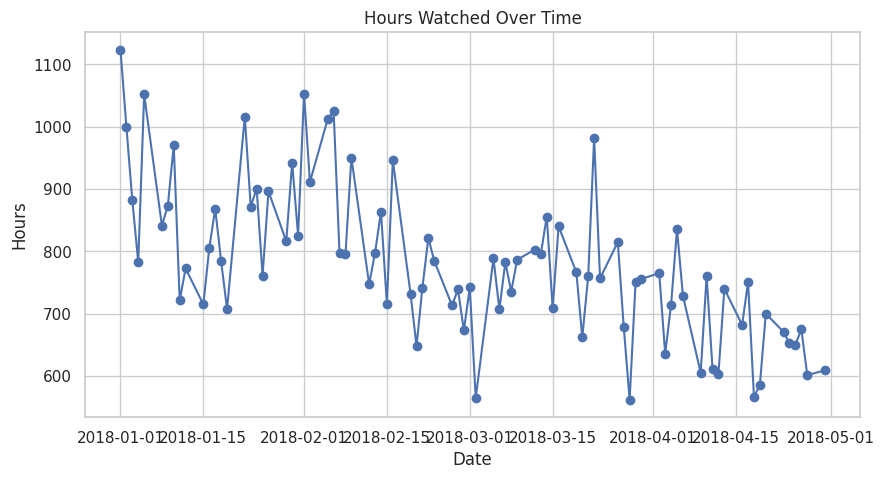

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(stc['date'], stc['hours'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Hours')
plt.title('Hours Watched Over Time')
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regrassion and Critical Values Calculation : ", dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
      print("\t", key, " : ", val)

In [ ]:
ad_test(stc['hours'])

1. ADF :  1123.551944444444
2. P-Value :  1000.129722222222
3. Num Of Lags :  881.9244444444445
4. Num Of Observations Used For ADF Regrassion and Critical Values Calculation :  782.6694444444445
5. Critical Values : 
	 1%  :  -3.512738056978279
	 5%  :  -2.8974898650628984
	 10%  :  -2.585948732897085


### Prepare the Data

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
# Set 'date' as index
# stc.set_index('date', inplace=True)

### Decompose the Time Series

In [ ]:
# Decompose the time series
decomposition = seasonal_decompose(stc['hours'], model='additive', period=30)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Combine components into a DataFrame
combined_df = pd.DataFrame({'trend': trend, 'seasonal': seasonal, 'residual': residual})

# Drop NaN values
combined_df.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(combined_df)
normalized_df = pd.DataFrame(normalized_data, columns=['trend', 'seasonal', 'residual'], index=combined_df.index)


### Plot Trend, Seasonality, and Residuals

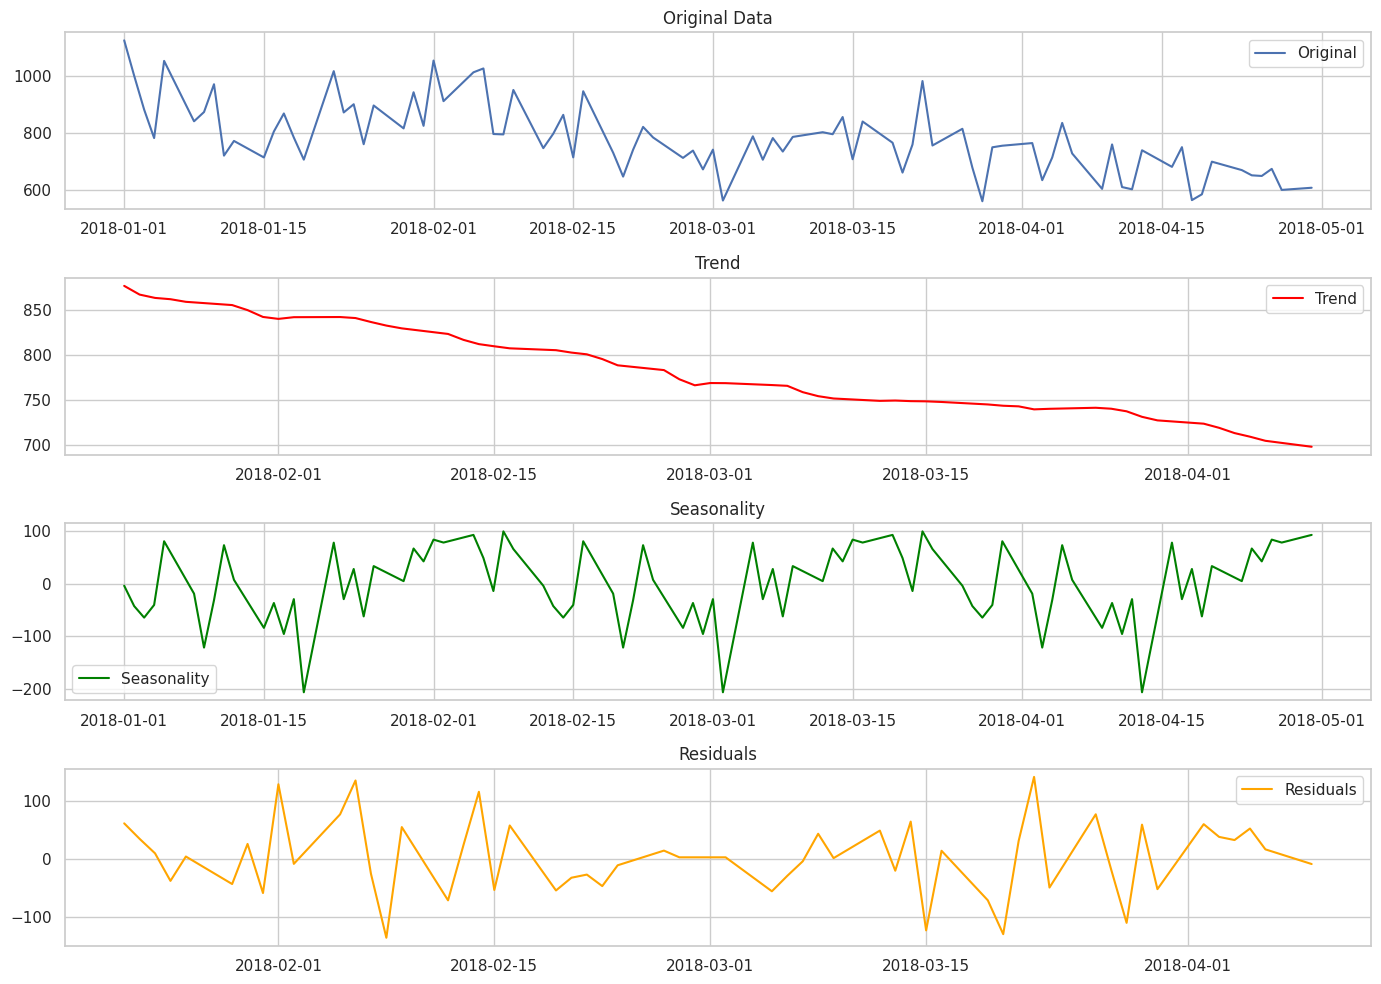

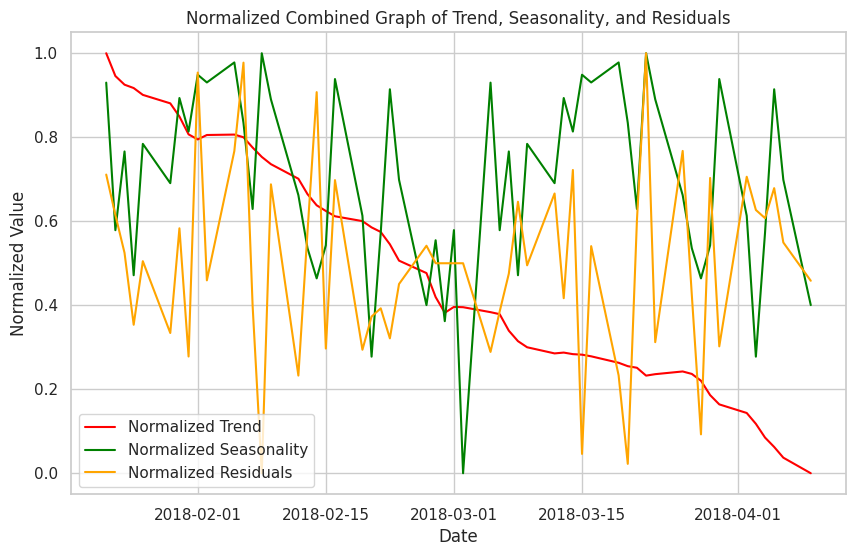

In [ ]:
plt.figure(figsize=(14, 10))

# Plot Original Data
plt.subplot(4, 1, 1)
plt.plot(stc['hours'], label='Original')
plt.title('Original Data')
plt.legend()

# Plot Trend
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='red')
plt.title('Trend')
plt.legend()

# Plot Seasonality
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.title('Seasonality')
plt.legend()

# Plot Residuals
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals', color='orange')
plt.title('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

# Plot Normalized Combined Graph
plt.figure(figsize=(10, 6))
plt.plot(normalized_df.index, normalized_df['trend'], label='Normalized Trend', color='red')
plt.plot(normalized_df.index, normalized_df['seasonal'], label='Normalized Seasonality', color='green')
plt.plot(normalized_df.index, normalized_df['residual'], label='Normalized Residuals', color='orange')
plt.title('Normalized Combined Graph of Trend, Seasonality, and Residuals')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()

plt.show()


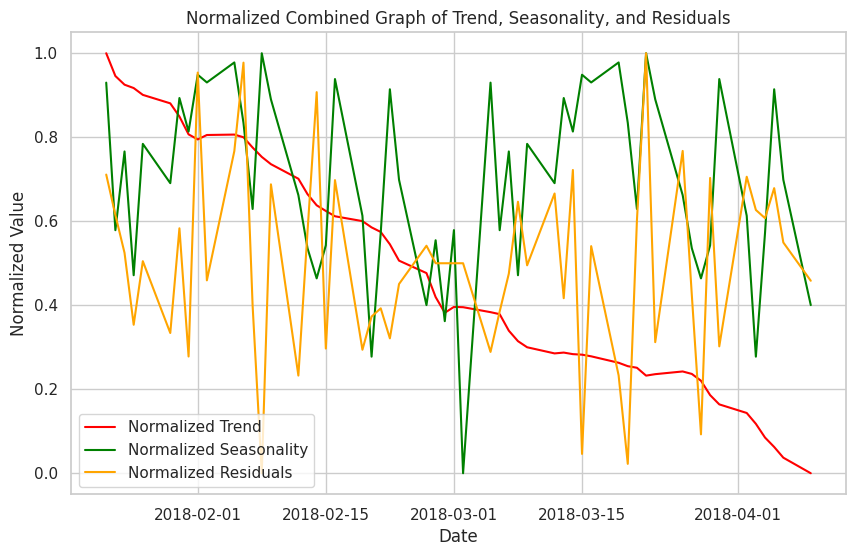

[[1.0, 0.9300333243954674, 0.7111187592710682],
 [0.9458299726945878, 0.5787122523046478, 0.6149080378806189],
 [0.9251785082661694, 0.766180776536967, 0.5247752990819348],
 [0.9171471389162251, 0.4714489238682583, 0.3535522633000001],
 [0.9009053858703657, 0.7842389809321312, 0.5049439331241815],
 [0.8807197490343768, 0.6906594937139098, 0.3339208723698524],
 [0.8493492802504452, 0.8934410988288877, 0.5832421906240917],
 [0.806848048095743, 0.8135404526588891, 0.27795017446314774],
 [0.7948436530853931, 0.9488089096683797, 0.9539689092033696],
 [0.8053713878977034, 0.9304869802976687, 0.45929044106088407]]

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(normalized_df.index, normalized_df['trend'], label='Normalized Trend', color='red')
plt.plot(normalized_df.index, normalized_df['seasonal'], label='Normalized Seasonality', color='green')
plt.plot(normalized_df.index, normalized_df['residual'], label='Normalized Residuals', color='orange')
plt.title('Normalized Combined Graph of Trend, Seasonality, and Residuals')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()

plt.show()

# Generate a list of normalized data
normalized_list = normalized_df.values.tolist()
normalized_list[:10]  # Display the first 10 rows of the normalized data list

In [ ]:
normalized_df.head()

,trend,seasonal,residual
date,,,
2018-01-22,1.000000,0.930033,0.711119
2018-01-23,0.945830,0.578712,0.614908
2018-01-24,0.925179,0.766181,0.524775
2018-01-25,0.917147,0.471449,0.353552
2018-01-26,0.900905,0.784239,0.504944


In [ ]:
ad_test(normalized_df['seasonal'])

1. ADF :  0.9300333243954674
2. P-Value :  0.5787122523046478
3. Num Of Lags :  0.766180776536967
4. Num Of Observations Used For ADF Regrassion and Critical Values Calculation :  0.4714489238682583
5. Critical Values : 
	 1%  :  -3.562878534649522
	 5%  :  -2.918973284023669
	 10%  :  -2.597393446745562


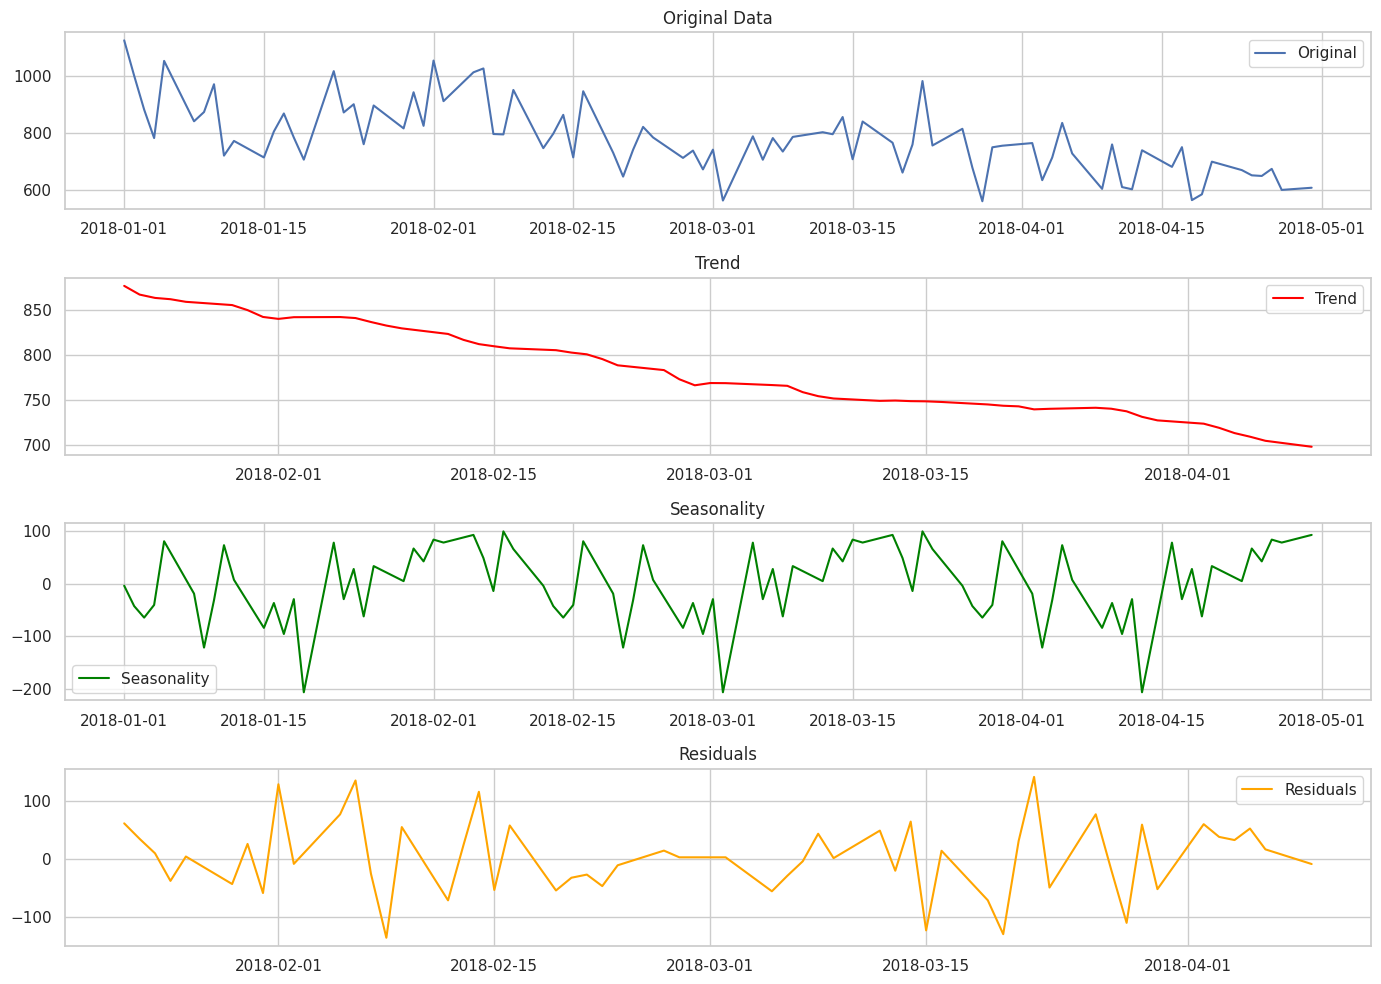

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Sample data for demonstration (replace with your actual data)
# stc = pd.DataFrame({'date': pd.date_range(start='2023-01-01', periods=100, freq='D'), 'hours': np.random.randn(100).cumsum()})

# Convert 'date' to datetime
# stc['date'] = pd.to_datetime(stc['date'])

# Set 'date' as index
# stc.set_index('date', inplace=True)

# Decompose the time series
decomposition = seasonal_decompose(stc['hours'], model='additive', period=30)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot each component
plt.figure(figsize=(14, 10))

# Plot Original Data
plt.subplot(4, 1, 1)
plt.plot(stc['hours'], label='Original')
plt.title('Original Data')
plt.legend()

# Plot Trend
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='red')
plt.title('Trend')
plt.legend()

# Plot Seasonality
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.title('Seasonality')
plt.legend()

# Plot Residuals
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals', color='orange')
plt.title('Residuals')
plt.legend()

plt.tight_layout()
plt.show()


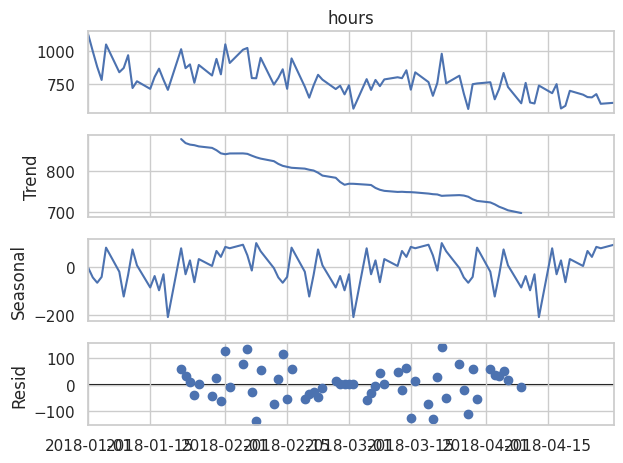

In [ ]:
decomposition.plot()
plt.show()

<function statsmodels.tsa.seasonal.seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)>